## Construct and compile model

In [1]:
%%bash
mkdir -p ./ex_toy01

In [2]:
%%bash
cat > ./ex_toy01/normal.stan << EOF
// DATA BLOCK | inputs to the model
data {
    int<lower=1> N; // number of data points; lower = 1 means to constrain N > 0
    real X[N];      // X[i] = gene expression for individual i
}

// PARAMETERS block = latent variables
parameters {
    real mu;                 // mu = mean expression value
    real<lower=0.001> sigma; // sigma = variance of expression values <lower=0.001> constrains sigma > 0
}

// MODEL BLOCK = priors and likelihoods
model {
    mu ~ normal(0,10);
    sigma ~ inv_gamma(1,1);
    for (i in 1:N) X[i] ~ normal(mu, sigma);
}
EOF

In [24]:
%%bash
cat > ./ex_toy01/normal.stan << EOF
data {
    int<lower=1> N;
    real X[N];
}

parameters {
    real mu;
    real<lower=0.001> sigma;
}

model {
    mu ~ normal(0,10);
    sigma ~ inv_gamma(1,1);
    for (i in 1:N) X[i] ~ normal(mu, sigma);
}
EOF

In [25]:
%%bash
### load modules
module load gcc
module load tbb

### set directory
STAN_PATH=/data/reddylab/Kuei/exe/cmdstan
FD_WRK=$(pwd)
echo $FD_WRK

### compile model
make -C $STAN_PATH ${FD_WRK}/ex_toy01/normal

/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan
make: Entering directory `/gpfs/fs1/data/reddylab/Kuei/exe/cmdstan'

--- Translating Stan model to C++ code ---
bin/stanc  --o=/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.hpp /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include   -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_5.7.0/include    -DBOOST_DISABLE_ASSERTS         -c -Wno-ignored-attributes   -x c++ -o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/ex_toy01/normal.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/

## Generate data

In [1]:
import numpy as np
import json

In [2]:
### simulation
np.random.seed(123)
neg = np.random.normal(loc=-1, scale=0.3, size=50)
print("Mean:", np.around(neg.mean(), 2))
print("SD:  ", np.around(neg.std(),  2))

Mean: -1.0
SD:   0.36


In [6]:
### generate data file
dct = dict()
dct["N"] = 50
dct["X"] = neg.tolist()

### store the data
fpath = "./ex_toy01/inputs.json"
with open(fpath, "w") as file:
    json.dump(dct, file)

In [7]:
%%bash
cat ./ex_toy01/inputs.json

{"N": 50, "X": [-1.3256891809901683, -0.7007963660249243, -0.9151064505844024, -1.4518884141754276, -1.173580075590561, -0.5045690388708547, -1.7280037730179223, -1.1286737886568532, -0.6202191223883398, -1.2600221206795306, -1.2036658454866163, -1.0284126906810673, -0.5525831121627136, -1.1916705990053953, -1.1331945878938197, -1.1303053826855551, -0.33822097518236327, -0.343964173307864, -0.6987838306363369, -0.8841440802475432, -0.7787894272311273, -0.5527803915547603, -1.2807501605207174, -0.647251286565369, -1.3761642003247037, -1.1913254507360231, -0.7278684412599097, -1.4286042100677907, -1.0420206160566, -1.2585264687579056, -1.076685811159179, -1.8395767316382172, -1.5314599313529542, -1.2099631703793752, -0.7217612704724252, -1.0520907048370647, -0.9991462252309566, -0.7935331866693145, -1.2638609029027155, -0.9149118028578127, -1.2416099554196847, -1.5183008482361822, -1.1172699381265303, -0.8278582412784827, -0.8984232847000595, -1.0035491483436458, -0.2822904202186822, -0.

## Running the model

In [14]:
%%bash
cat > ./ex_toy01/init.json << EOF
{
    "mu" :   -0.67,
    "sigma":  2.5
}
EOF

after several testing, 
- init.json, init.txt --- passed
- output.txt, output.csv --- passed
- inputs.json ---passed
- inputs.txt --- failed
    - Error: Exception: variable does not exist

In [15]:
%%bash
module load gcc
./ex_toy01/normal sample \
    thin=1 num_samples=1000 num_warmup=50 \
    init=./ex_toy01/init.json \
    data file=./ex_toy01/inputs.json \
    output file=./ex_toy01/output.csv

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./ex_toy01/inputs.json
init = ./ex_toy01/init.json
random
  seed = 2996367183 (Default)
output
  file = ./ex_toy01/output.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 3.7e-05 seconds
100

In [16]:
import pandas as pd

In [18]:
dat = pd.read_csv("./ex_toy01/output.csv", comment='#')
dat.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma
0,23.4146,1.000000,0.048678,2,3,0,-22.9104,-0.937924,0.416687
1,23.7135,0.975547,0.048678,2,7,0,-21.0652,-1.042000,0.328202
2,23.7220,0.843871,0.048678,1,3,0,-19.9682,-1.070290,0.375400
3,23.1078,0.953922,0.048678,2,7,0,-22.3241,-0.928821,0.422067
4,23.4930,0.991094,0.048678,2,7,0,-22.4581,-1.062140,0.336925


<AxesSubplot:>

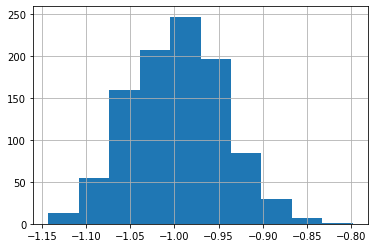

In [19]:
dat.mu.hist()